In [2]:
import plotly.graph_objects as go
from ipywidgets import interactive, HBox, VBox, widgets

# Function to update the graph based on the sliders
def update_graph(angle_x1, angle_y1, angle_x2, angle_y2, angle_x3, angle_y3):
    # Calculate the end points of the vectors based on angles
    vector1 = [np.sin(angle_x1) * np.cos(angle_y1), np.cos(angle_x1) * np.cos(angle_y1), np.sin(angle_y1)]
    vector2 = [np.sin(angle_x2) * np.cos(angle_y2), np.cos(angle_x2) * np.cos(angle_y2), np.sin(angle_y2)]
    vector3 = [np.sin(angle_x3) * np.cos(angle_y3), np.cos(angle_x3) * np.cos(angle_y3), np.sin(angle_y3)]

    # Creating the 3D plot
    fig = go.Figure()

    # Adding the three vectors
    fig.add_trace(go.Scatter3d(x=[0, vector1[0]], y=[0, vector1[1]], z=[0, vector1[2]], 
                               mode='lines+markers', marker=dict(size=4), name='Vector 1', line=dict(color='red')))
    fig.add_trace(go.Scatter3d(x=[0, vector2[0]], y=[0, vector2[1]], z=[0, vector2[2]], 
                               mode='lines+markers', marker=dict(size=4), name='Vector 2', line=dict(color='green')))
    fig.add_trace(go.Scatter3d(x=[0, vector3[0]], y=[0, vector3[1]], z=[0, vector3[2]], 
                               mode='lines+markers', marker=dict(size=4), name='Vector 3', line=dict(color='blue')))

    # Adding dashed lines for projection onto the y-axis
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[0, vector1[1]], z=[0, 0],
                               mode='lines', name='Projection 1', line=dict(color='red', width=2, dash='dash')))
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[0, vector2[1]], z=[0, 0],
                               mode='lines', name='Projection 2', line=dict(color='green', width=2, dash='dash')))
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[0, vector3[1]], z=[0, 0],
                               mode='lines', name='Projection 3', line=dict(color='blue', width=2, dash='dash')))

    # Updating layout for better visualization
    fig.update_layout(title='3D Vectors with Projections onto Y-Axis',
                      scene=dict(xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis'),
                      showlegend=True)

    # Displaying the plot
    fig.show()

# Sliders for adjusting the vectors
angle_x1 = widgets.FloatSlider(min=0, max=2*np.pi, value=np.pi/4, description='Angle X1')
angle_y1 = widgets.FloatSlider(min=0, max=np.pi, value=np.pi/4, description='Angle Y1')
angle_x2 = widgets.FloatSlider(min=0, max=2*np.pi, value=np.pi/4, description='Angle X2')
angle_y2 = widgets.FloatSlider(min=0, max=np.pi, value=np.pi/4, description='Angle Y2')
angle_x3 = widgets.FloatSlider(min=0, max=2*np.pi, value=np.pi/4, description='Angle X3')
angle_y3 = widgets.FloatSlider(min=0, max=np.pi, value=np.pi/4, description='Angle Y3')

# Interactive widget
interactive_plot = interactive(update_graph, angle_x1=angle_x1, angle_y1=angle_y1, 
                               angle_x2=angle_x2, angle_y2=angle_y2, 
                               angle_x3=angle_x3, angle_y3=angle_y3)
VBox([interactive_plot])


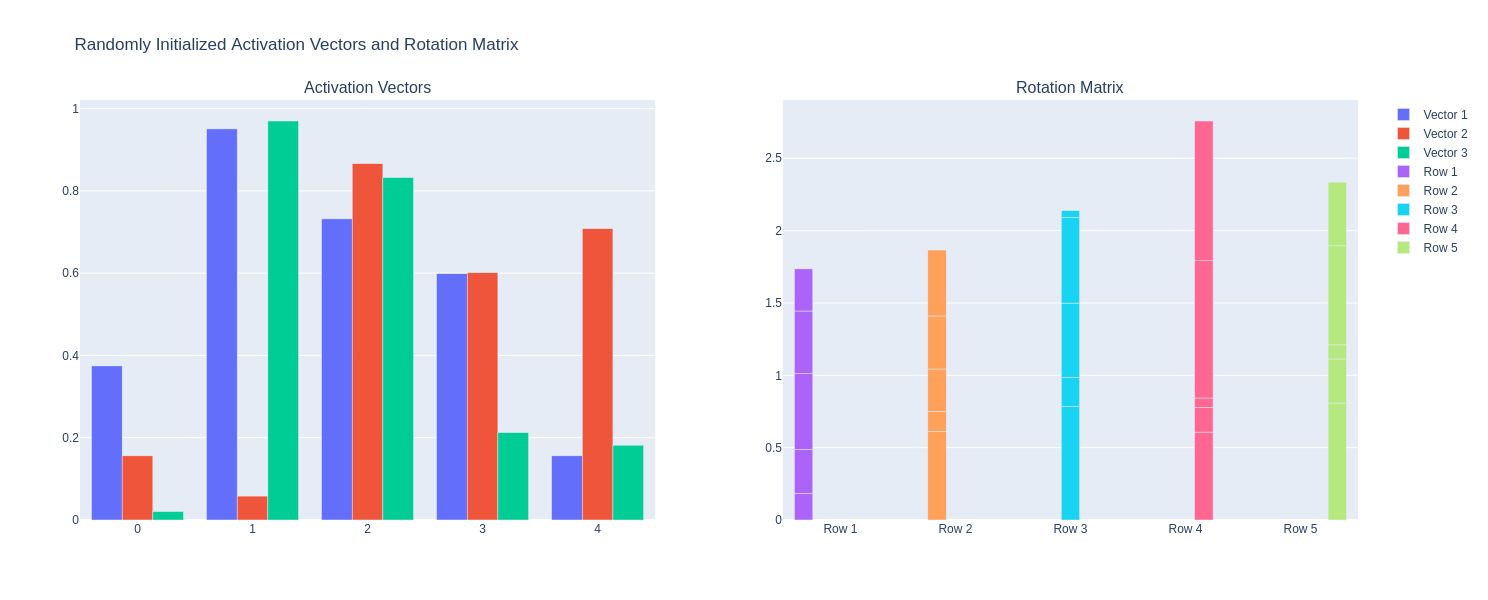

In [3]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

# Initialize random data for the activation vectors and rotation matrix
np.random.seed(42)  # For reproducibility
activation_vectors = np.random.rand(3, 5)  # 3 activation vectors, 5 elements each
rotation_matrix = np.random.rand(5, 5)  # 5x5 rotation matrix

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Activation Vectors", "Rotation Matrix"))

# Add activation vectors to the subplot
for i, vector in enumerate(activation_vectors):
    fig.add_trace(go.Bar(x=list(range(len(vector))), y=vector, name=f"Vector {i+1}"), row=1, col=1)

# Add rotation matrix to the subplot
for i in range(rotation_matrix.shape[0]):
    fig.add_trace(go.Bar(x=[f"Row {i+1}"]*rotation_matrix.shape[1], y=rotation_matrix[i], name=f"Row {i+1}"), row=1, col=2)

# Update layout for a cleaner look
fig.update_layout(height=600, width=1200, title_text="Randomly Initialized Activation Vectors and Rotation Matrix")

# Show figure
fig.show()


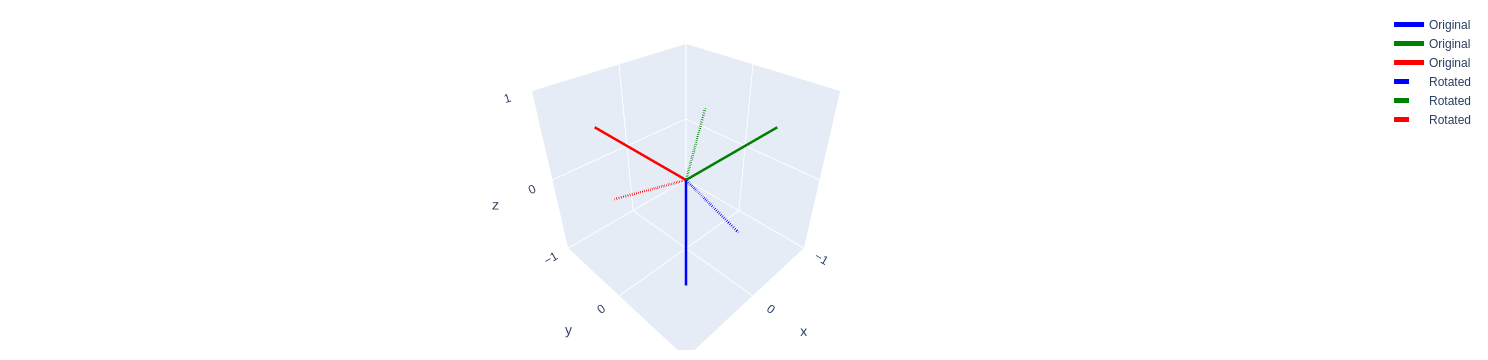

In [8]:
import plotly.graph_objects as go
import numpy as np

# Function to create a 3D rotation matrix
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians using Euler-Rodrigues formula.
    """
    axis = np.asarray(axis)
    axis = axis / np.sqrt(np.dot(axis, axis))
    a = np.cos(theta / 2.0)
    b, c, d = -axis * np.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

# Create a figure
fig = go.Figure()

# Number of points to create
num_points = 100

# Original vectors
vectors = np.array([[1, 1, 0], [0, 1, 1], [1, 0, 1]])

# Apply rotation matrix
theta = np.pi / 4  # 45 degrees
rotation_axis = [1, 1, 1]  # Diagonal axis

# Colors
colors = ['blue', 'green', 'red']  # Example colors

# Plot original vectors
for i, vec in enumerate(vectors):
    fig.add_trace(go.Scatter3d(x=[0, vec[0]], y=[0, vec[1]], z=[0, vec[2]], 
                               mode='lines', 
                               line=dict(width=5, color=colors[i]),
                               name='Original'))


# Apply rotation to each vector
rotated_vectors = np.array([np.dot(rotation_matrix(rotation_axis, theta), vec) for vec in vectors])

# Plot rotated vectors
for i, vec in enumerate(rotated_vectors):
    fig.add_trace(go.Scatter3d(x=[0, vec[0]], y=[0, vec[1]], z=[0, vec[2]], 
                               mode='lines',
                               line=dict(width=5, color=colors[i], dash='dash'),
                               name='Rotated'))
# Set the layout of the figure
fig.update_layout(scene=dict(
                    xaxis=dict(nticks=4, range=[-1,1]),
                    yaxis=dict(nticks=4, range=[-1,1]),
                    zaxis=dict(nticks=4, range=[-1,1]),
                    ),
                  width=700,
                  margin=dict(r=20, l=10, b=10, t=10))

# Show the figure
fig.show()
